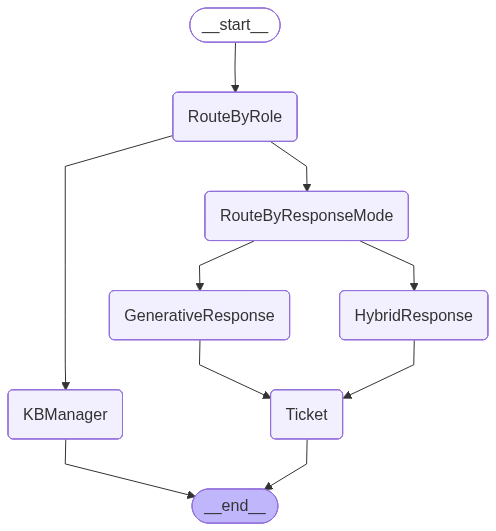

In [7]:
from langgraph.graph import StateGraph, END
from IPython.display import Image, display

from app.agents.support_graph import (
    SupportState,
    route_by_role,
    route_by_response_mode,
    generative_agent_node,
    hybrid_response_node,
    ticket_node,
    kb_save_entry_node,
)

sg = StateGraph(SupportState)

sg.add_node("RouteByRole", route_by_role)
sg.add_node("RouteByResponseMode", route_by_response_mode)
sg.add_node("GenerativeResponse", generative_agent_node)
sg.add_node("HybridResponse", hybrid_response_node)
sg.add_node("Ticket", ticket_node)
sg.add_node("KBManager", kb_save_entry_node)

sg.set_entry_point("RouteByRole")

sg.add_edge("RouteByRole", "RouteByResponseMode")
sg.add_edge("RouteByRole", "KBManager")


sg.add_edge("RouteByResponseMode", "GenerativeResponse")
sg.add_edge("RouteByResponseMode", "HybridResponse")

sg.add_edge("GenerativeResponse", "Ticket")
sg.add_edge("HybridResponse", "Ticket")

sg.add_edge("GenerativeResponse", END)
sg.add_edge("HybridResponse", END)
sg.add_edge("Ticket", END)
sg.add_edge("KBManager", END)

compiled = sg.compile()

display(Image(compiled.get_graph().draw_mermaid_png()))
